In [20]:
import pandas as pd
from dateutil.parser import parse as parseDate
import re
import matplotlib.pyplot as plt
import numpy as np
import pickle as pkl
import math

In [21]:
# d2LevelNames = {}
# d3LevelNames = {}

# data = []
# headers = None

# with open('./data/attend.csv', 'r') as f:
#     lc = 0
    
#     for line in f:
        
#         line = line.strip()
#         line= re.split(",(?=(?:[^\"]*\"[^\"]*\")*[^\"]*$)", line)
        
#         if headers is None:
#             headers = line
#             continue
        
#         workId = int(line[0])
#         groupId = int(line[1])
#         userId = int(line[2])
        
#         d2LevelName = line[3]
#         if d2LevelName not in d2LevelNames:
#             d2LevelNames[d2LevelName] = len(d2LevelNames)
#         d2LevelId = d2LevelNames[d2LevelName]
        
#         d3LevelName = line[4]
#         if d3LevelName not in d3LevelNames:
#             d3LevelNames[d3LevelName] = len(d3LevelNames)
#         d3LevelId = d3LevelNames[d3LevelName]
        
#         onlineId = True if line[5] == 'Да' else False
#         date = parseDate(line[6])
        
#         dataItem = {
#             'workId': workId,
#             'groupId': groupId,
#             'userId': userId,
#             'd2LevelId': d2LevelId,
#             'd3LevelId': d3LevelId,
#             'online': onlineId,
#             'date': date
#         }
        
#         data.append(dataItem)
        
#         lc += 1

# pkl.dump(d2LevelNames, open('./data/d2LevelNames.pkl', 'wb'))
# pkl.dump(d3LevelNames, open('./data/d3LevelNames.pkl', 'wb'))

# len(df['workId'].unique()), len(df['d2LevelId'].unique()), len(df['d3LevelId'].unique())
# df = pd.DataFrame.from_records(data)
# df.to_csv('./data/attendShort.csv')

In [5]:
import pickle as pkl
import pandas as pd

d2LevelNames = pkl.load(open('./data/d2LevelNames.pkl', 'rb'))
d3LevelNames = pkl.load(open('./data/d3LevelNames.pkl', 'rb'))
df = pd.read_csv('./data/attendShort.csv')
df['date'] = df['date'].apply(parseDate)

In [43]:
d2LevelNamesReverse = {v: k for k, v in d2LevelNames.items()}
d3LevelNamesReverse = {v: k for k, v in d3LevelNames.items()}

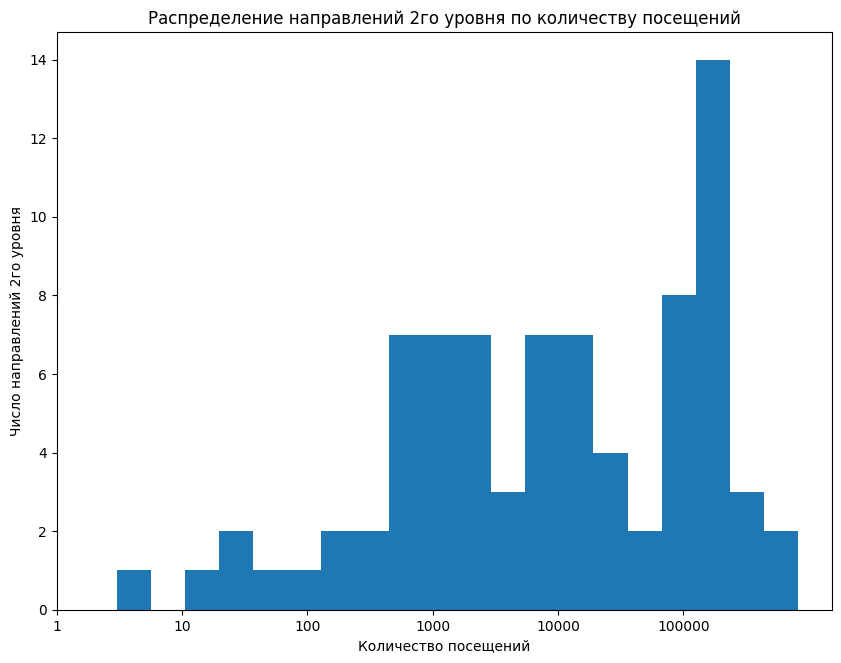

In [208]:
plt.figure(figsize = (10, 7.5))

_ = plt.hist(np.log10(df.groupby('d2LevelId').agg({'userId': 'count'})['userId']), bins = 20)
_ = plt.xticks(range(math.ceil(_[1].max())), [10 ** x for x in range(math.ceil(_[1].max()))])

plt.title('Распределение направлений 2го уровня по количеству посещений')
plt.ylabel("Число направлений 2го уровня")
plt.xlabel("Количество посещений")
plt.savefig('./out/d2LevelHist.png')

dfOut = df.groupby('d2LevelId').agg({'userId': 'count'}).reset_index()
dfOut['d2LevelName'] = dfOut['d2LevelId'].apply(lambda x: d2LevelNamesReverse[x])

dfOut = dfOut[['d2LevelName', 'userId']].rename(columns = {'d2LevelName': "Название", "userId": "Число посещений"})
dfOut.to_csv('./out/d2LevelHist.csv')

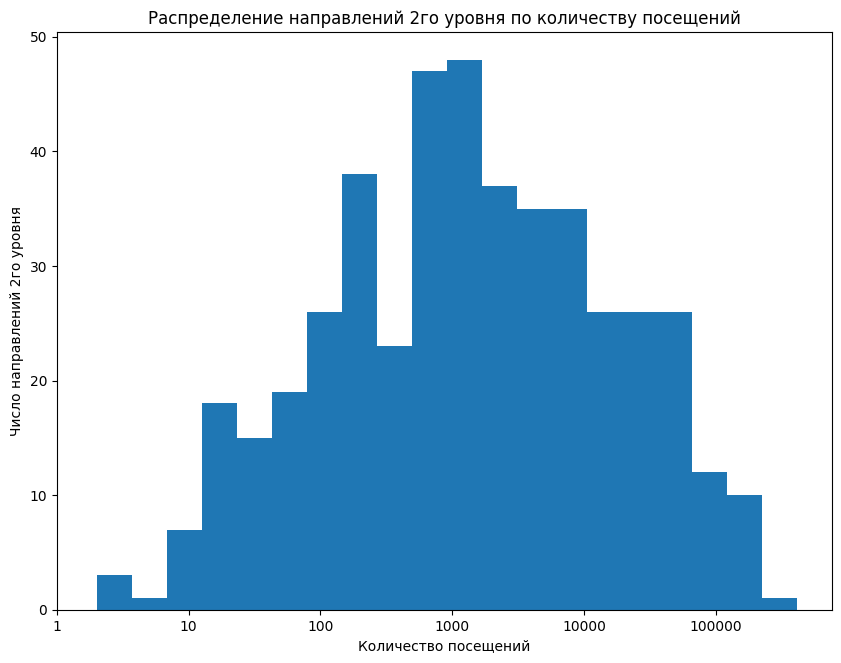

In [210]:
plt.figure(figsize = (10, 7.5))

_ = plt.hist(np.log10(df.groupby('d3LevelId').agg({'userId': 'count'})['userId']), bins = 20)
_ = plt.xticks(range(math.ceil(_[1].max())), [10 ** x for x in range(math.ceil(_[1].max()))])

plt.title('Распределение направлений 2го уровня по количеству посещений')
plt.ylabel("Число направлений 2го уровня")
plt.xlabel("Количество посещений")
plt.savefig('./out/d3LevelHist.png')

dfOut = df.groupby('d3LevelId').agg({'userId': 'count'}).reset_index()
dfOut['d3LevelName'] = dfOut['d3LevelId'].apply(lambda x: d3LevelNamesReverse[x])

dfOut = dfOut[['d3LevelName', 'userId']].rename(columns = {'d3LevelName': "Название", "userId": "Число посещений"})
dfOut.to_csv('./out/d3LevelHist.csv')

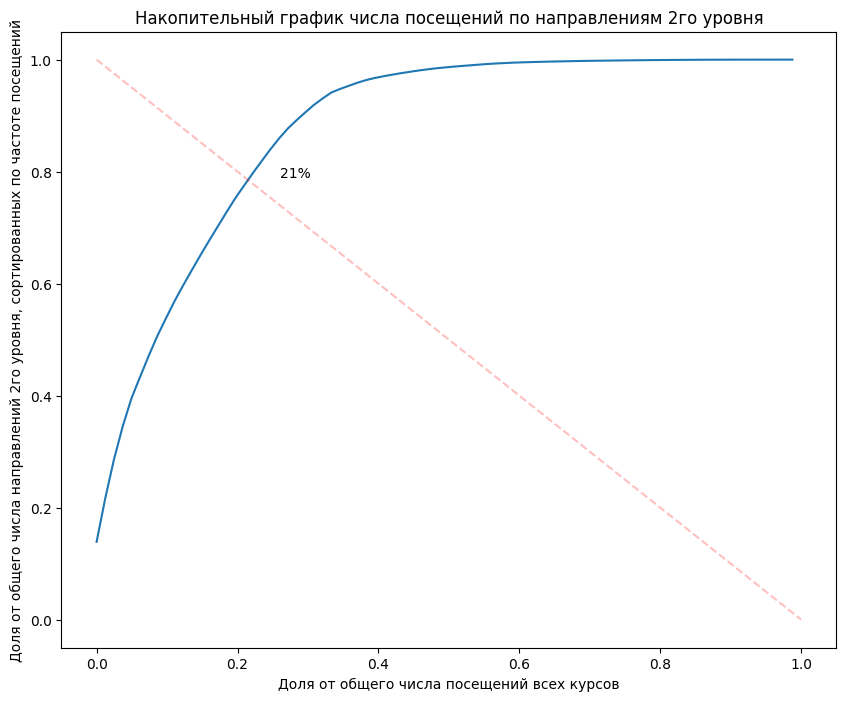

In [243]:
x = sorted(df.groupby('d2LevelId').agg({'userId': 'count'})['userId'])[::-1]
xSum = sum(x)

xCum = []

for xx in x:
    xCum.append((xCum[-1] + xx) if len(xCum) > 0 else xx)

xCum = [x / xSum for x in xCum]

plt.figure(figsize = (10, 8))

plt.plot([i / len(x) for i in range(len(xCum))], xCum)
plt.plot([0, 1], [1, 0], ls = '--', color = 'red', alpha = 0.25)

pIndex = np.argmin(
    np.abs(
        np.interp(np.linspace(0, 1, 100), [i / len(x) for i in range(len(xCum))], xCum) - np.linspace(1, 0, 100)
    )
)

plt.title('Накопительный график числа посещений по направлениям 2го уровня')
plt.ylabel("Доля от общего числа направлений 2го уровня, сортированных по частоте посещений")
plt.xlabel("Доля от общего числа посещений всех курсов")

plt.text(pIndex / 100 + 0.05, 1 - pIndex / 100, '%d%%'%pIndex)

plt.savefig('./out/d2LevelParetto.png')

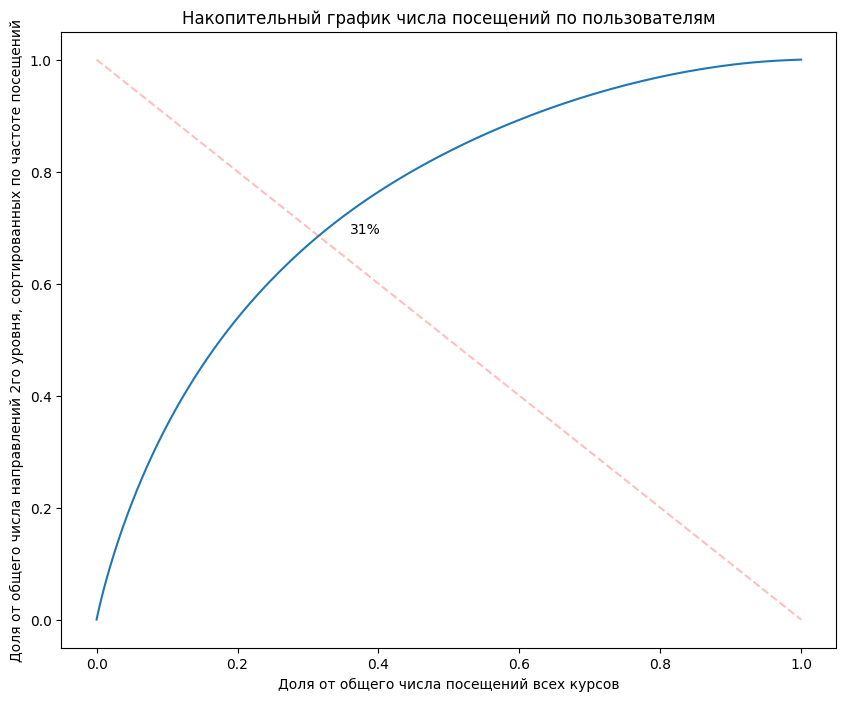

In [246]:
x = sorted(df.groupby('userId').agg({'date': 'count'})['date'])[::-1]
xSum = sum(x)

xCum = []

for xx in x:
    xCum.append((xCum[-1] + xx) if len(xCum) > 0 else xx)

xCum = [x / xSum for x in xCum]

plt.figure(figsize = (10, 8))

plt.plot([i / len(x) for i in range(len(xCum))], xCum)
plt.plot([0, 1], [1, 0], ls = '--', color = 'red', alpha = 0.25)

pIndex = np.argmin(
    np.abs(
        np.interp(np.linspace(0, 1, 100), [i / len(x) for i in range(len(xCum))], xCum) - np.linspace(1, 0, 100)
    )
)

plt.title('Накопительный график числа посещений по пользователям')
plt.ylabel("Доля от общего числа направлений 2го уровня, сортированных по частоте посещений")
plt.xlabel("Доля от общего числа посещений всех курсов")

plt.text(pIndex / 100 + 0.05, 1 - pIndex / 100, '%d%%'%pIndex)

plt.savefig('./out/userParetto.png')

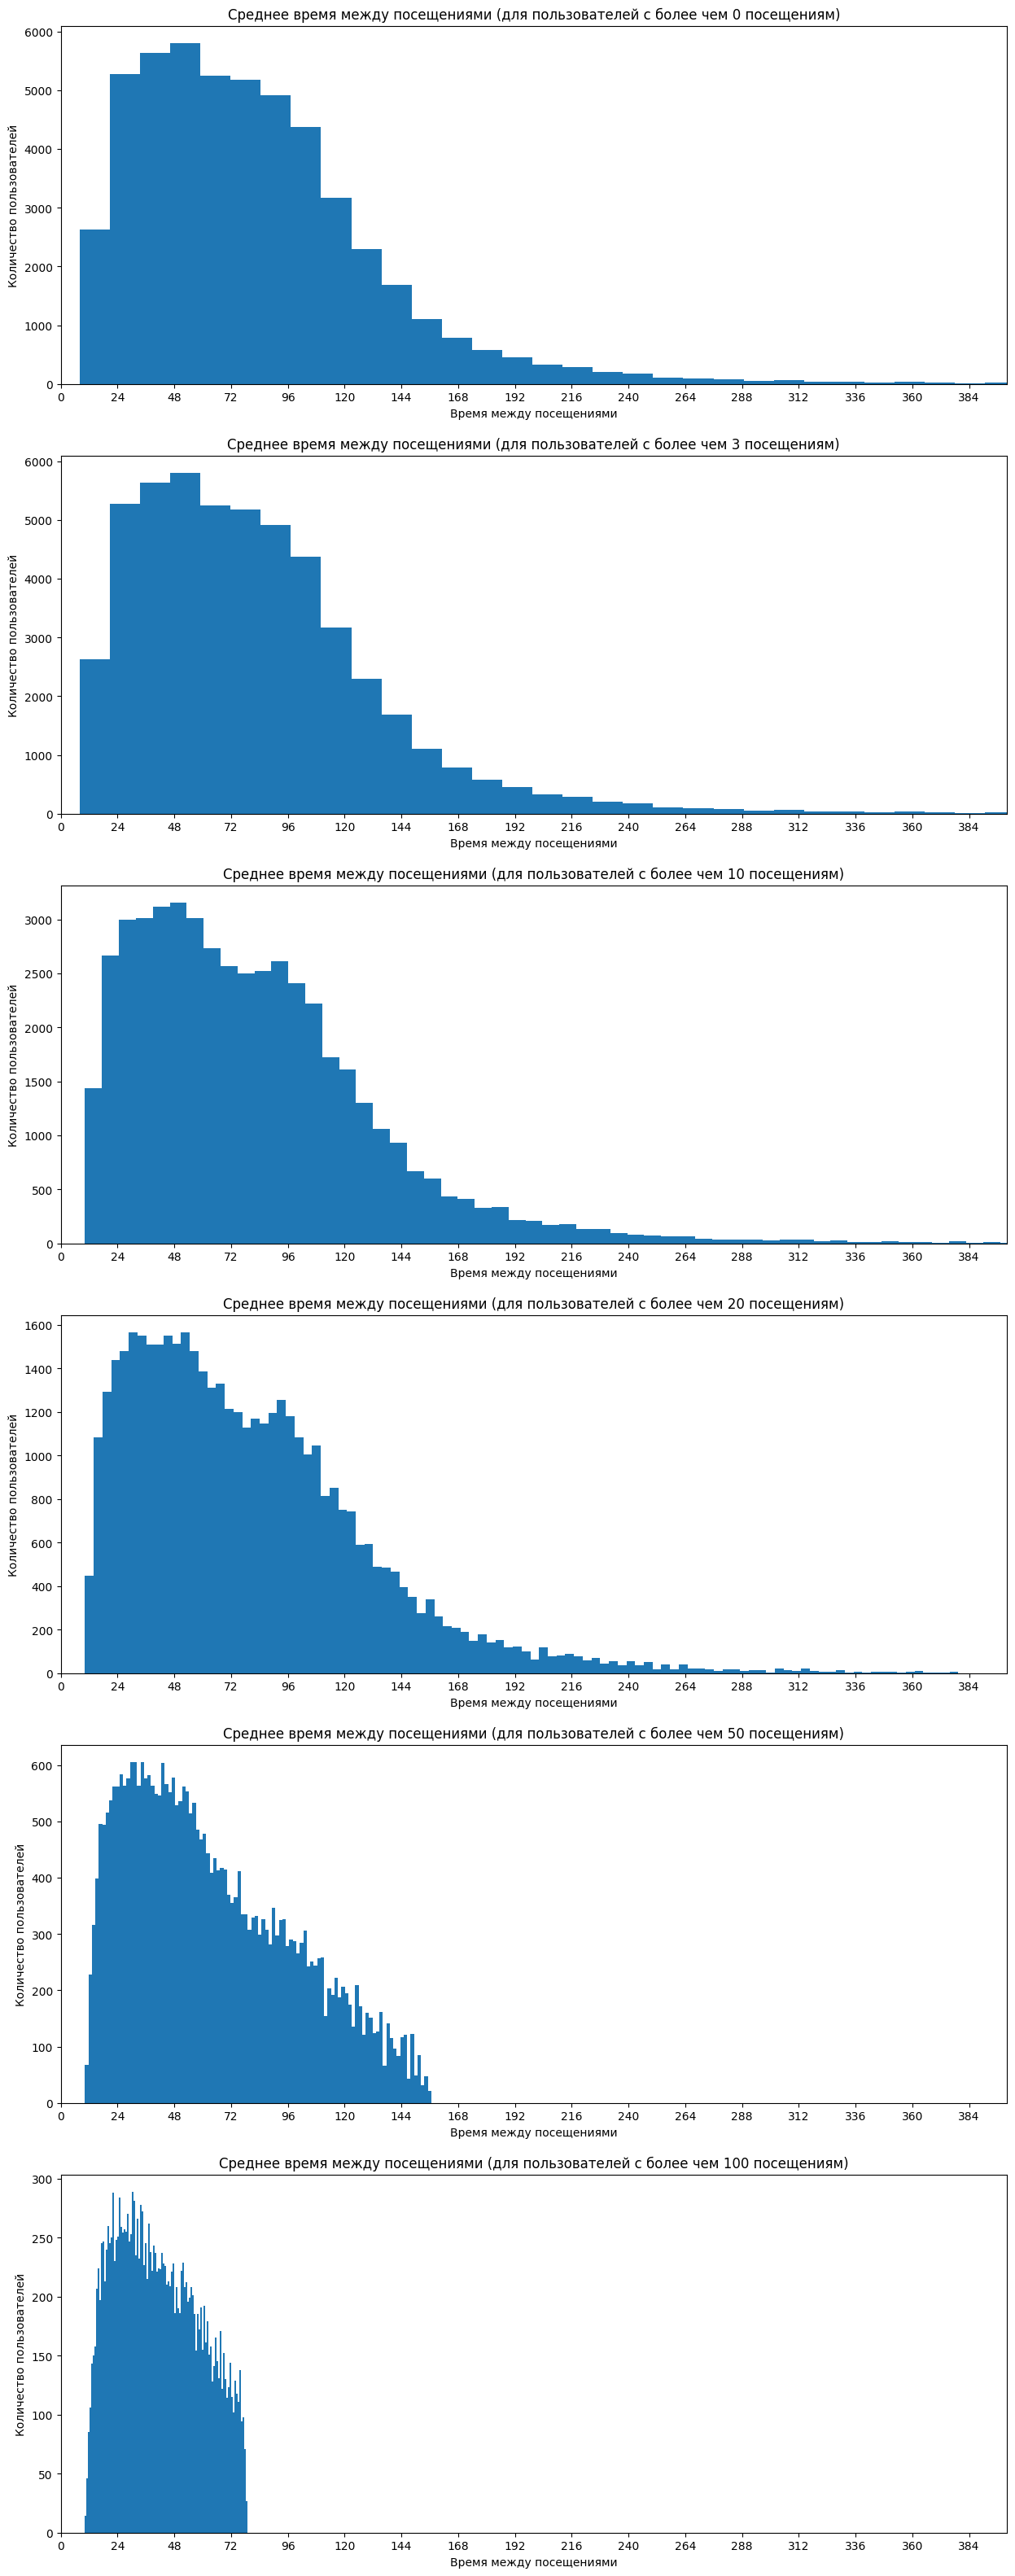

In [261]:
thresholds = [0, 3, 10, 20, 50, 100]

fig, axes = plt.subplots(len(thresholds), 1, figsize = (15, 40))

for t, ax in zip(thresholds, axes):
    dff = df.groupby('userId').agg({'date': ['min', 'max', 'count']})

    dff = dff[dff[('date', 'count')] > t]

    dff['meanDateRange'] = (dff[('date', 'max')] - dff[('date', 'min')]) / dff[('date', 'count')] / np.timedelta64(1, 'h')

    _ = ax.hist(dff['meanDateRange'], bins = 100)
    ax.set_xlim(0, 400)
    ax.set_xticks(range(0, 400, 24))
    
    ax.set_title('Среднее время между посещениями (для пользователей с более чем %d посещениям)'%t)
    ax.set_ylabel("Количество пользователей")
    ax.set_xlabel("Время между посещениями")

plt.savefig('./out/timeHists.png')

In [35]:
(df.groupby('userId').agg({'date': 'count'})['date'] > 200).sum()

8719

In [36]:
dff = df.groupby('userId').agg({'d2LevelId': list})

In [37]:
mat = np.zeros((max(d2LevelNames.values()), max(d2LevelNames.values())))

In [38]:
x = list(dff['d2LevelId'])

In [40]:
dfg = pd.read_csv('./data/users.csv')
dfg = dfg[['уникальный номер', 'пол']].rename(columns = {'уникальный номер': 'userId', 'пол': 'gender'})
df = df.merge(dfg, on = 'userId', how = 'inner')

In [270]:
dfAge = pd.read_csv('./data/users.csv')
dfAge = dfg[['уникальный номер', 'дата рождения']].rename(columns = {'уникальный номер': 'userId', 'дата рождения': 'age'})
dfAge['age'] = dfAge['age'].apply(lambda x: parseDate(x))

In [274]:
dfAge['age'] = dfAge['age'].apply(lambda x: (datetime.now() - x).days / 365.25)

In [275]:
df = df.merge(dfAge, on = 'userId', how = 'inner')

In [292]:
from sklearn.cluster import AffinityPropagation
import numpy as np

def plotHeatMap(df_, name, title, damping = 0.97):
    
    plt.figure(figsize = (20, 20))
    
    dff = pd.pivot_table(df_, index = 'userId', columns = 'd2LevelId', values = 'date', aggfunc = 'count').fillna(0)

    dffCorr = dff.corr()

    X = dffCorr.values
    clustering = AffinityPropagation(damping = damping, random_state=5, affinity = 'precomputed').fit(X)

    d2LevelNamesReverse = {v : k for k, v in d2LevelNames.items()}

    f = open('./out/' + name.replace('.png', '.txt'), 'w')
    
    print(clustering.labels_)
    
    for i in range(clustering.labels_.max()):
        f.write(
            "%d\t%s"%
            (
                i, 
                ';'.join([d2LevelNamesReverse[j] for j in np.where(clustering.labels_ == i)[0]])
            )
        )
        
    f.close()

    columns_ = []
    clusters_ = []

    for c in set(clustering.labels_):
        columns_ += list(dffCorr.columns[np.where(clustering.labels_ == c)])
        clusters_.extend([c] * (clustering.labels_ == c).sum())

    clusters_ = np.array(clusters_)

    plt.figure(figsize = (20, 20))

    dffCorr = dff[columns_].corr()

    plt.imshow(dffCorr.values)
    _ = plt.xticks(range(len(dffCorr.columns)), [d2LevelNamesReverse[i] for i in dffCorr.columns], rotation = 90)
    _ = plt.yticks(range(len(dffCorr.columns)), [d2LevelNamesReverse[i] for i in dffCorr.columns])

    for c in set(clustering.labels_):
        xMin, xMax = np.min(np.where(clusters_ == c)) - 0.5, np.max(np.where(clusters_ == c)) + 0.5
        plt.plot([xMin, xMin, xMax, xMax, xMin], [xMin, xMax, xMax, xMin, xMin], color = 'red')

    plt.title(title)
        
    plt.savefig(f'./out/{name}', dpi = 200)

<Figure size 2000x2000 with 0 Axes>

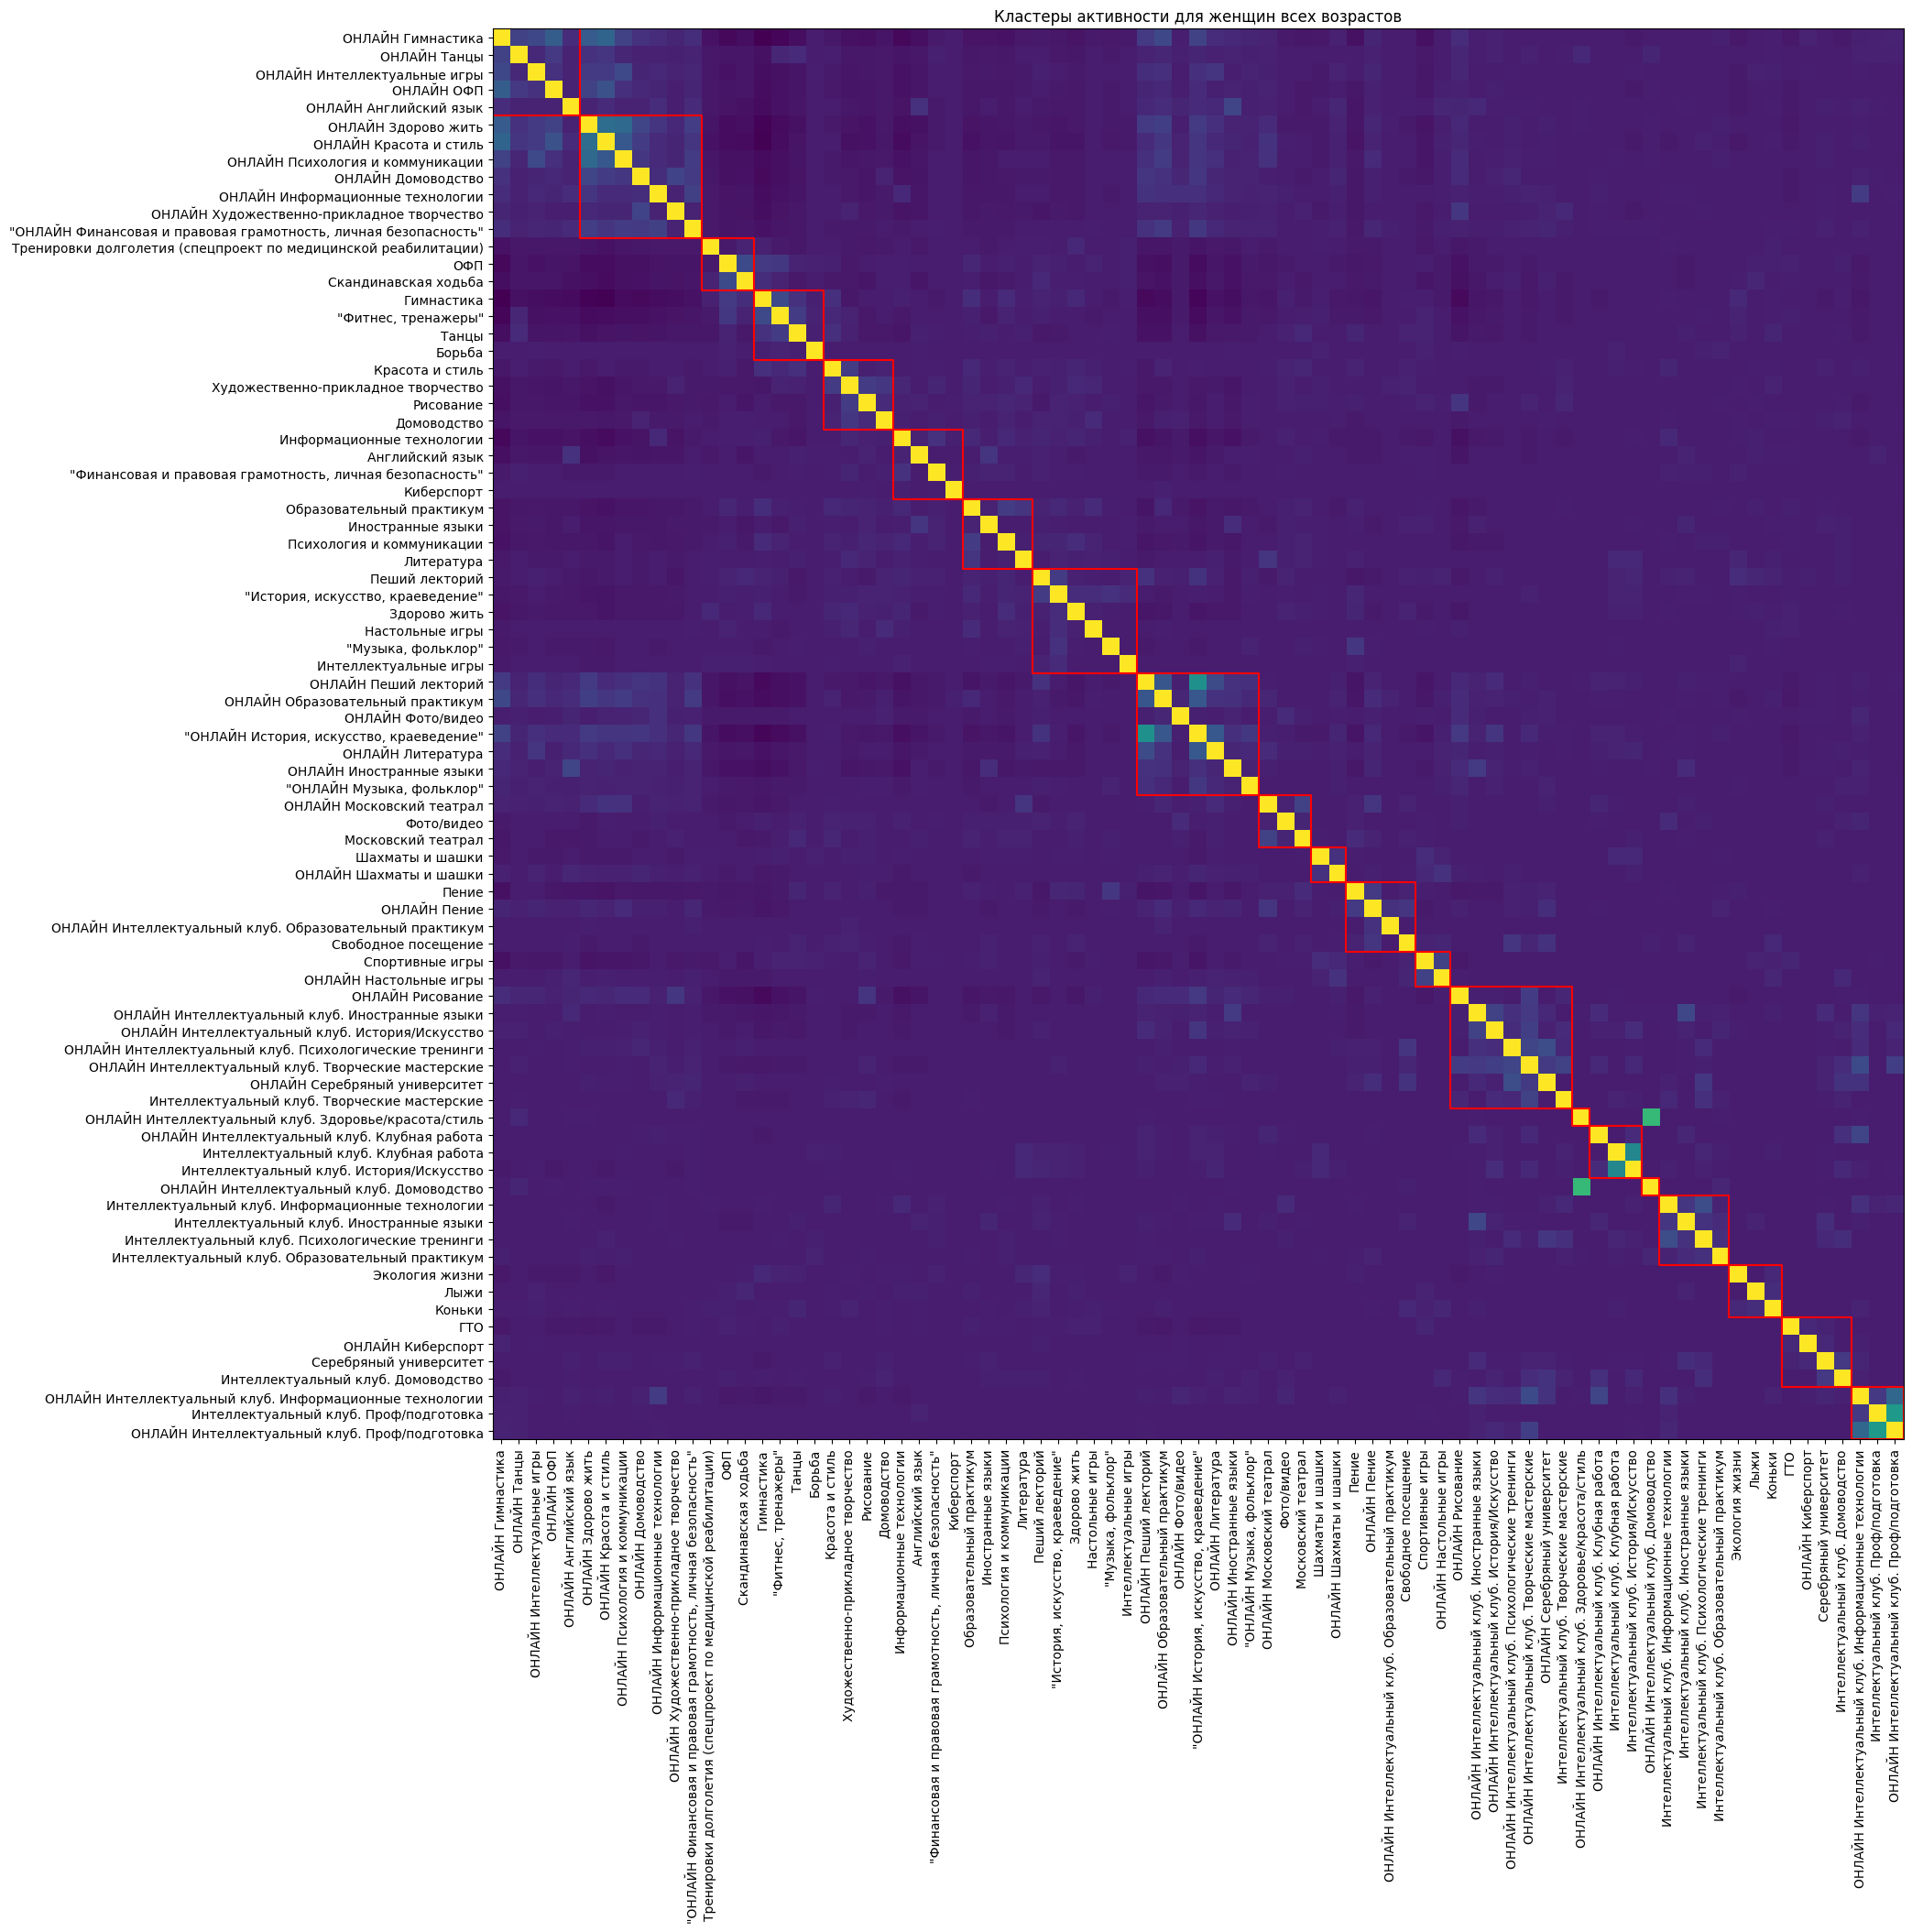

<Figure size 2000x2000 with 0 Axes>

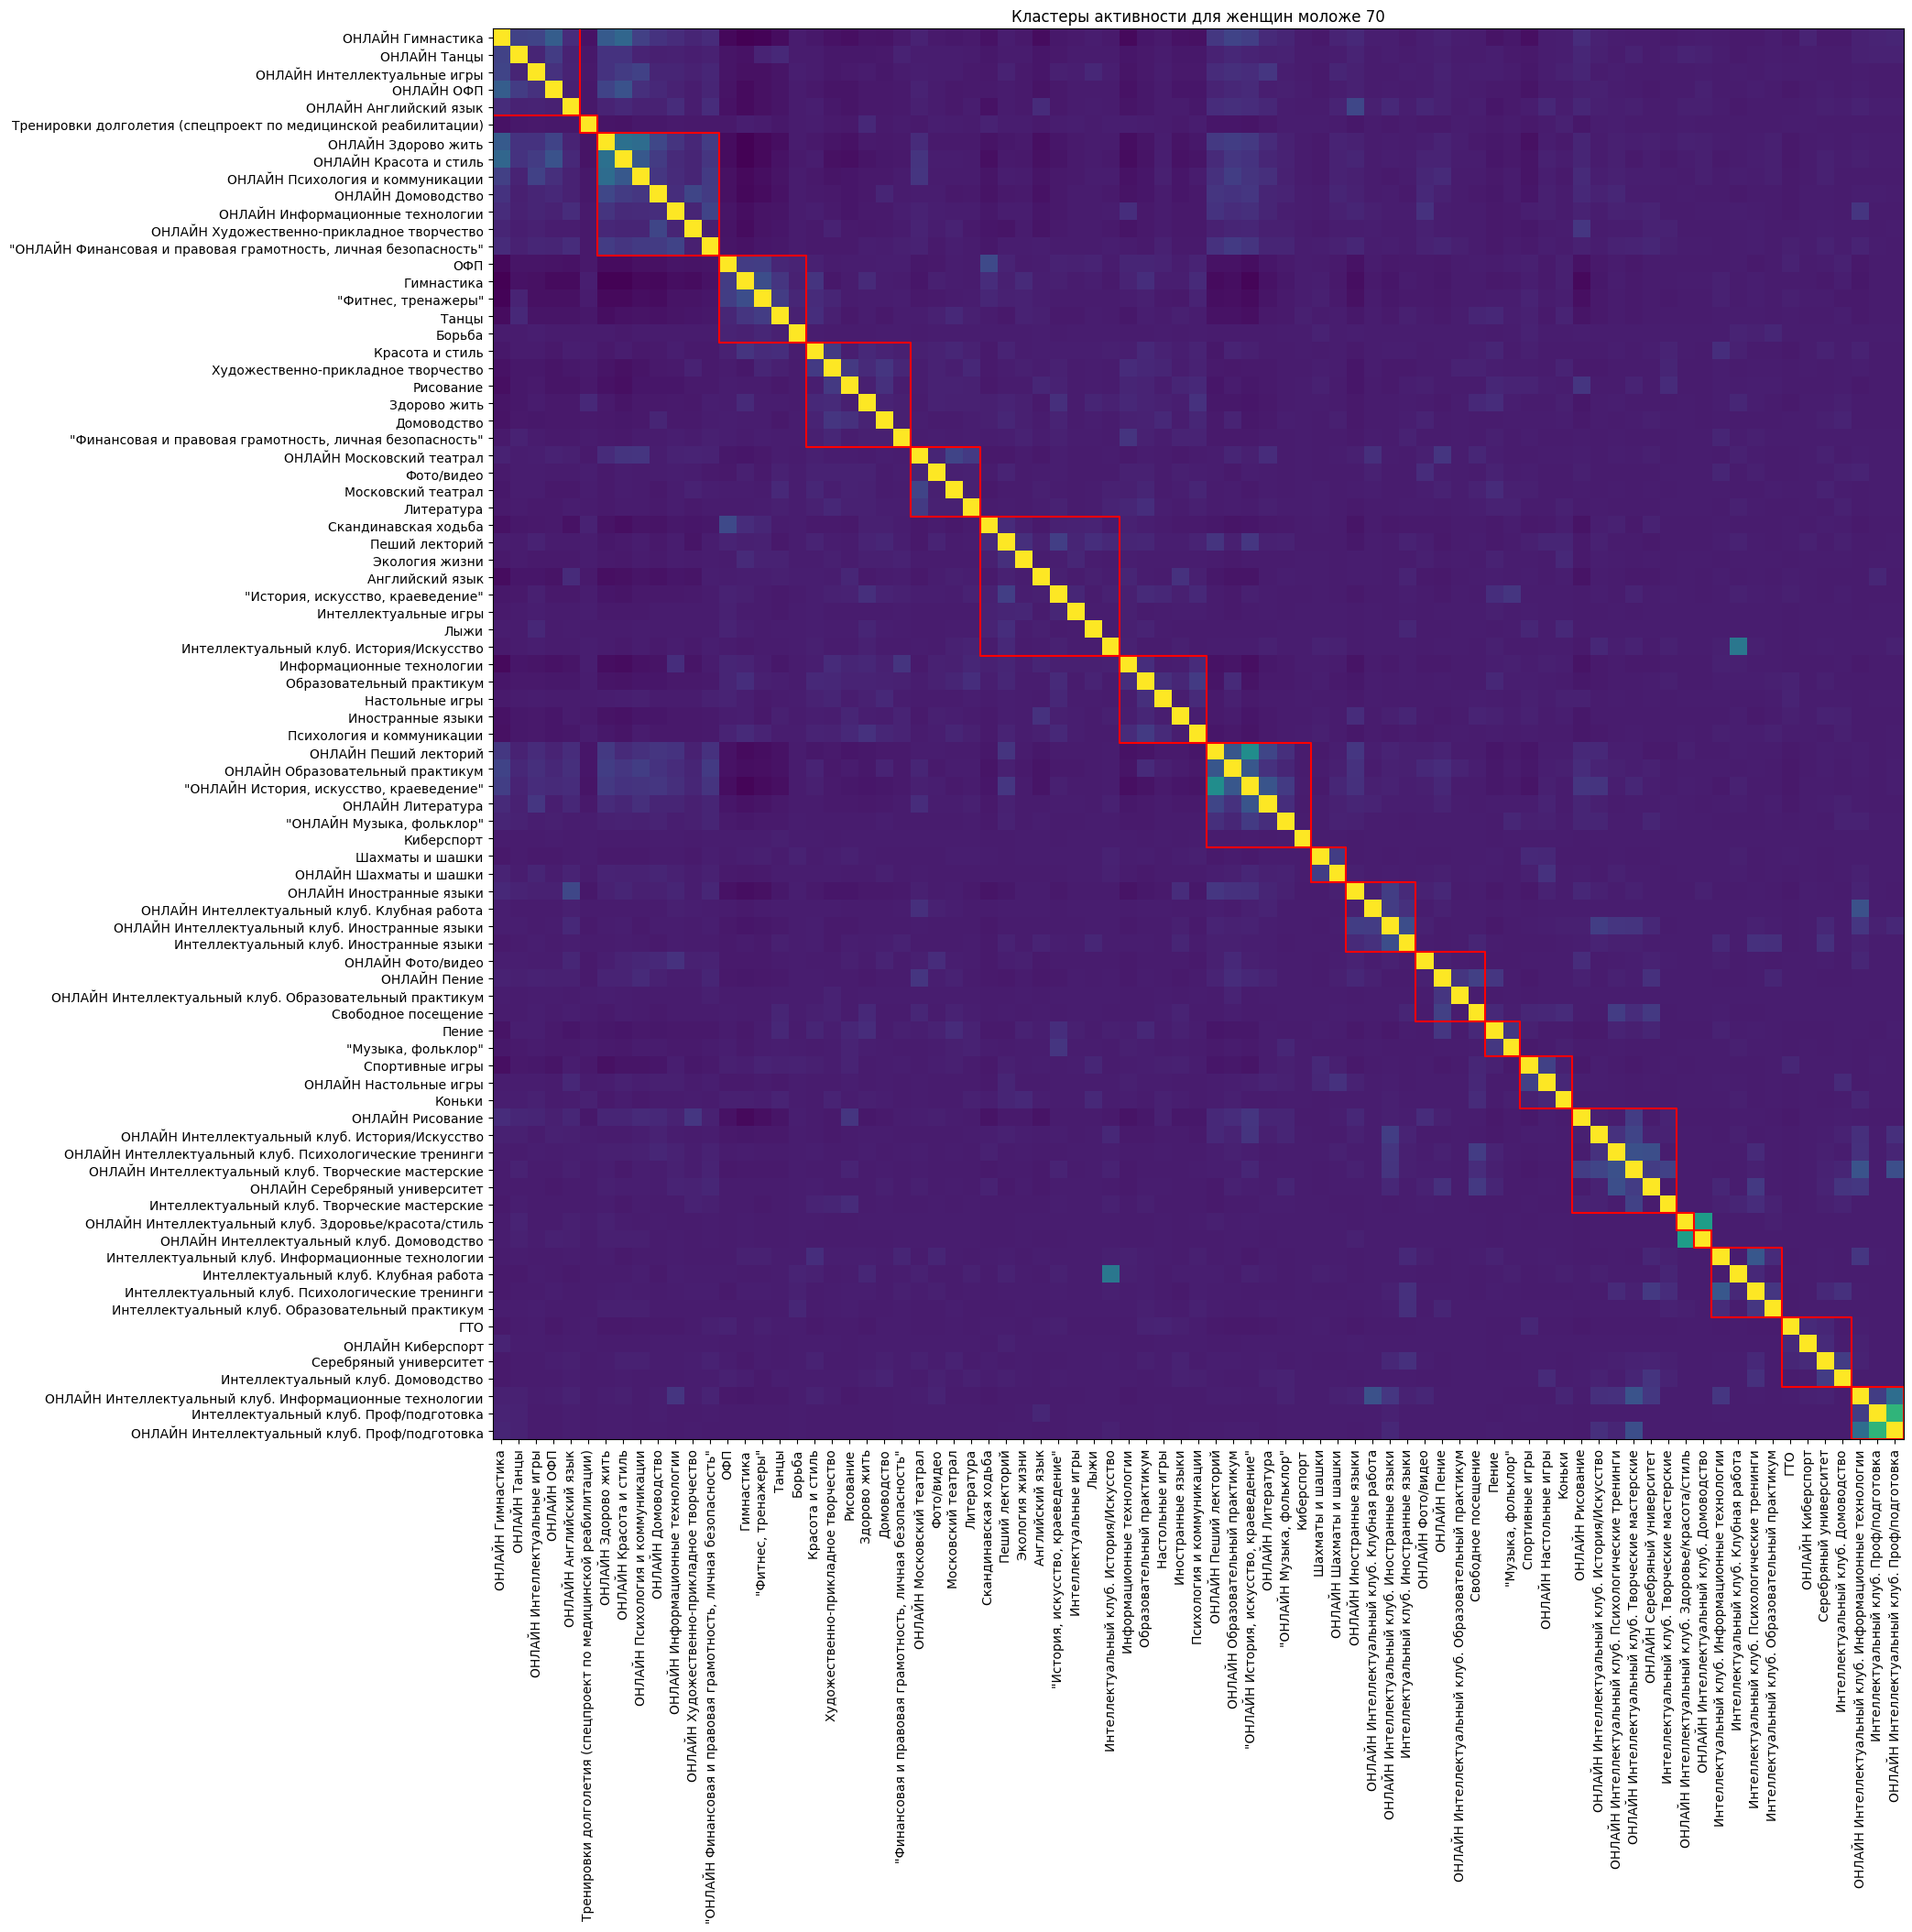

<Figure size 2000x2000 with 0 Axes>

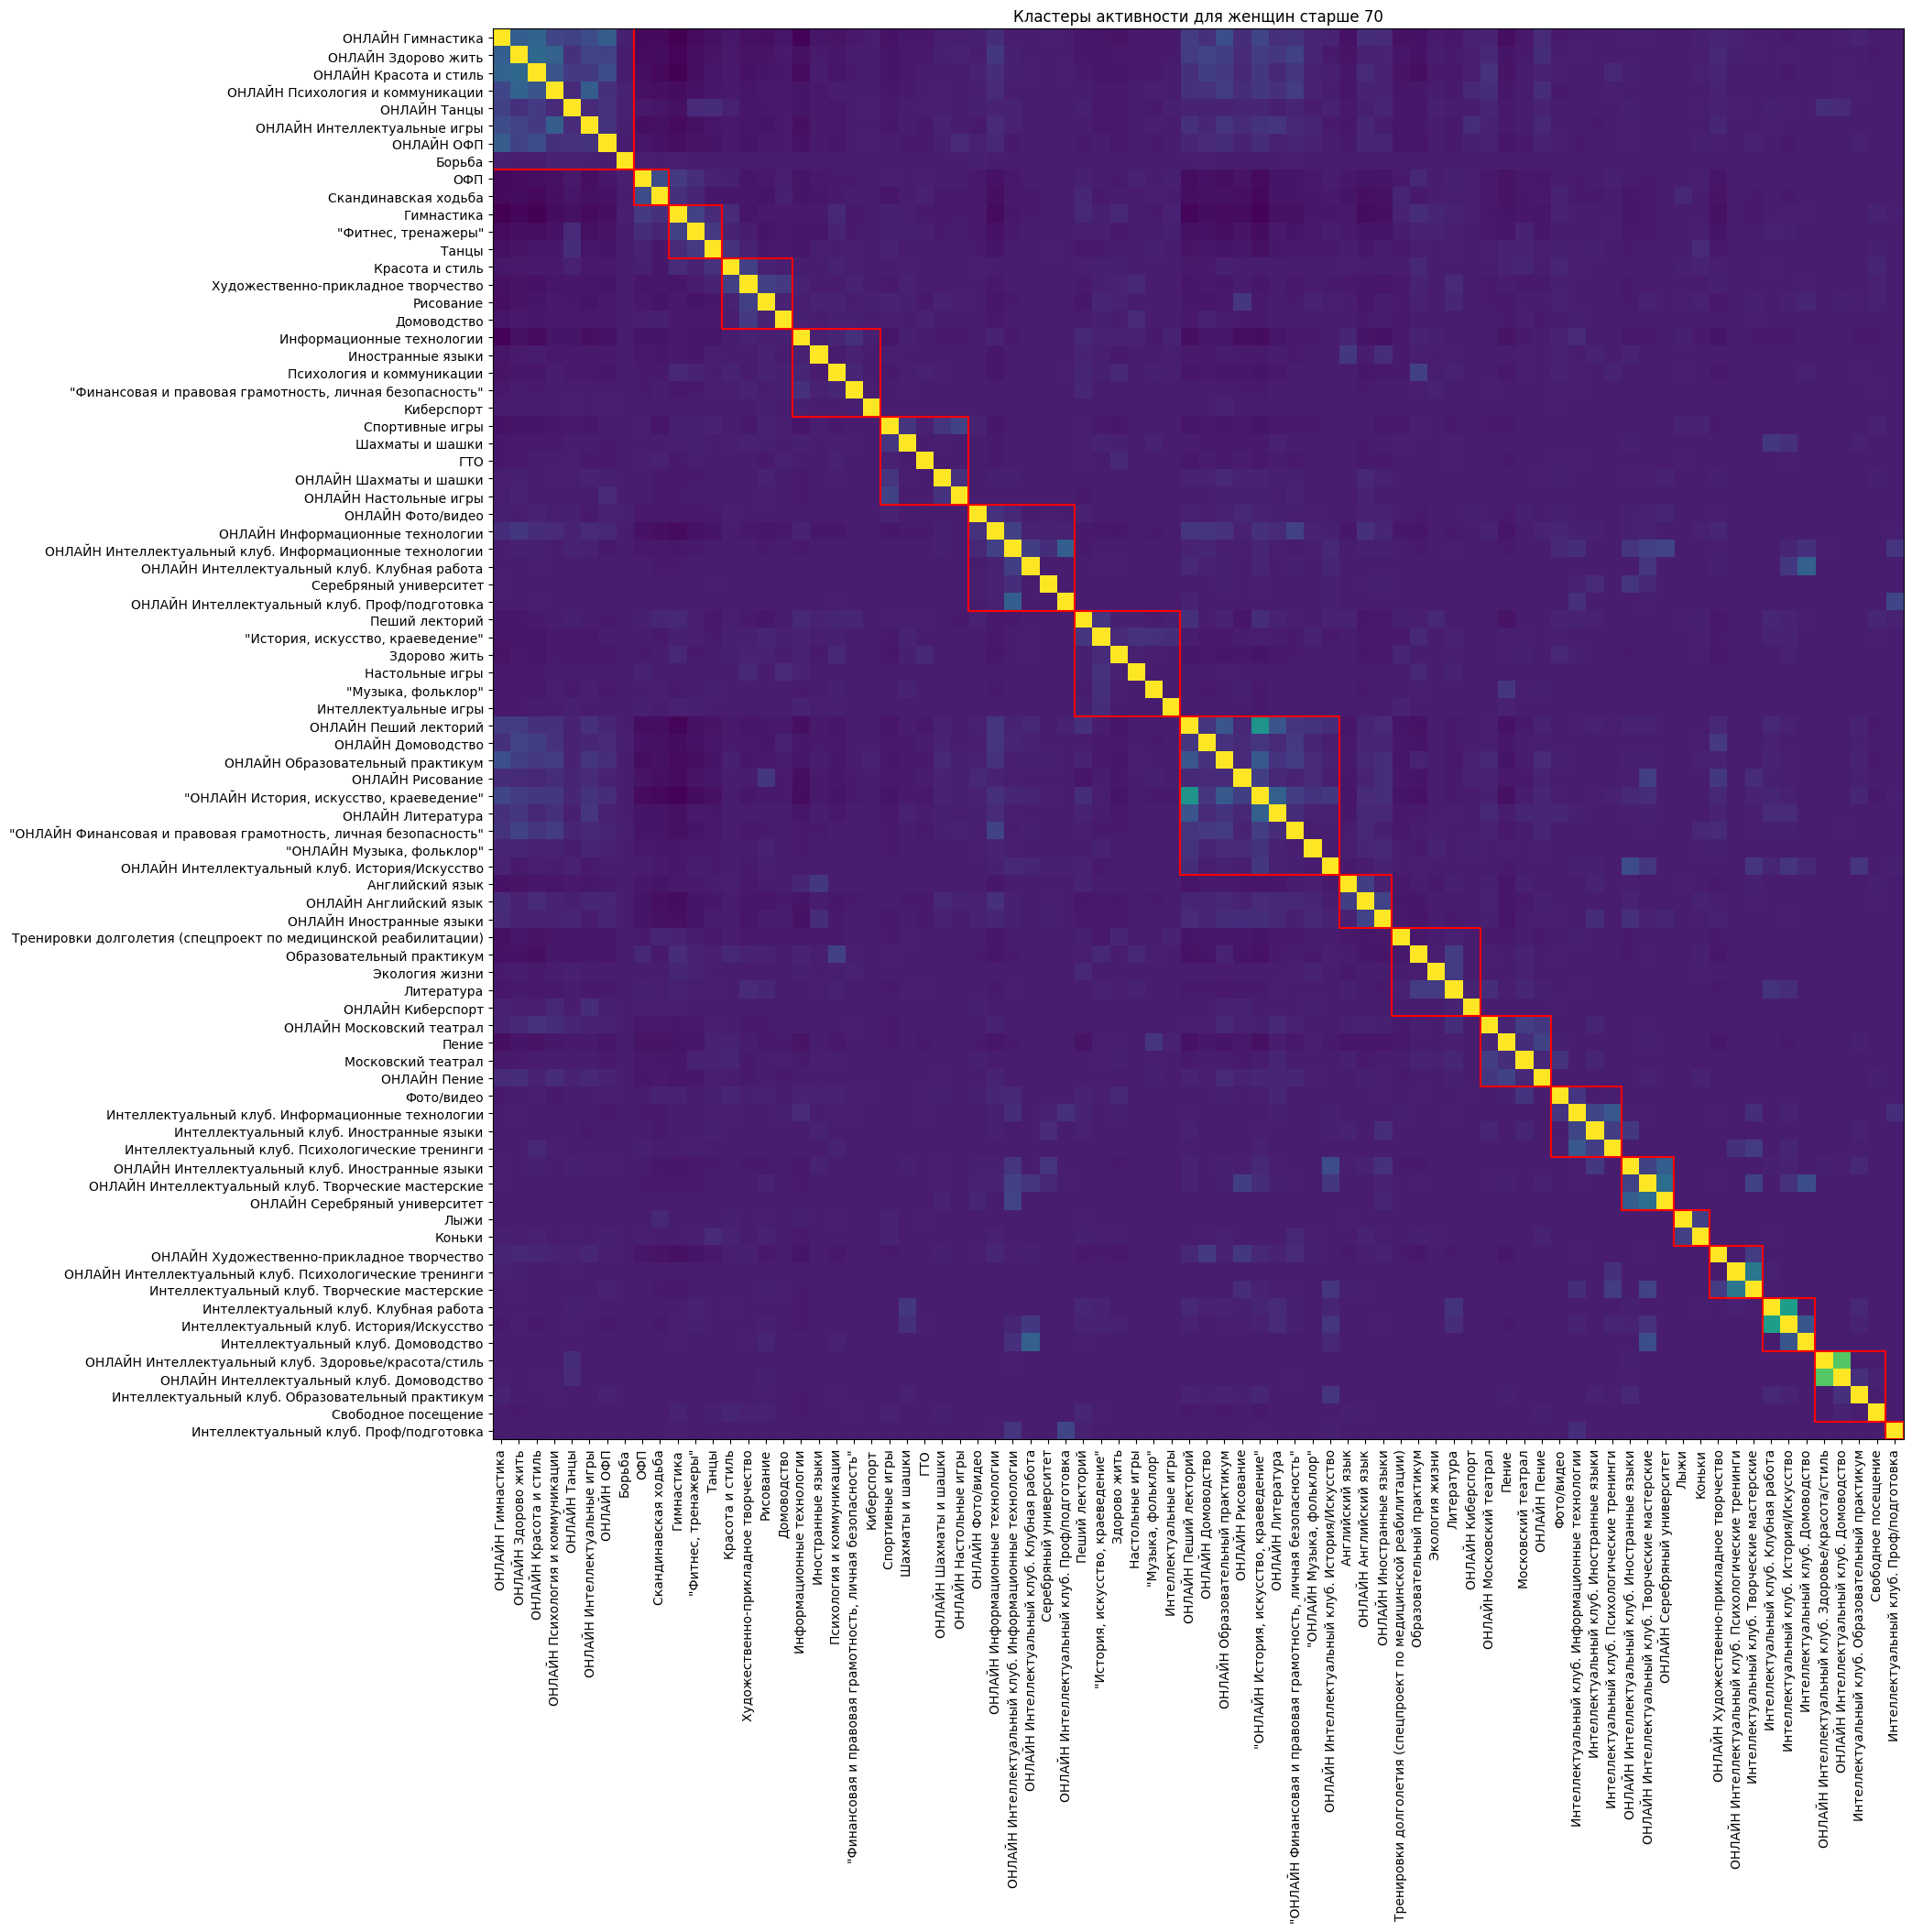

In [282]:
df_ = df[df['gender'] == 'Женщина']
plotHeatMap(df_, 'd2HeatmapFemaleAll.png', "Кластеры активности для женщин всех возрастов")

df_ = df[(df['gender'] == 'Женщина')&(df['age'] < 70)]
plotHeatMap(df_, 'd2HeatmapFemaleBefore70.png', "Кластеры активности для женщин моложе 70")

df_ = df[(df['gender'] == 'Женщина')&(df['age'] >= 70)]
plotHeatMap(df_, 'd2HeatmapFemaleAfter70.png', "Кластеры активности для женщин старше 70")

In [ ]:
df_ = df[df['gender'] == 'Мужчина']
plotHeatMap(df_, 'd2HeatmapMaleAll.png', "Кластеры активности для мужчин всех возрастов")

df_ = df[(df['gender'] == 'Мужчина')&(df['age'] < 70)]
plotHeatMap(df_, 'd2HeatmapMaleBefore70.png', "Кластеры активности для мужчин моложе 70", damping = 0.9)

df_ = df[(df['gender'] == 'Мужчина')&(df['age'] >= 70)]
plotHeatMap(df_, 'd2HeatmapMaleAfter70.png', "Кластеры активности для мужчин старше 70")

<Figure size 2000x2000 with 0 Axes>

/tmp/ipykernel_642138/1573346581.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_['age'] = df_['age'].apply(lambda x: math.floor(x))


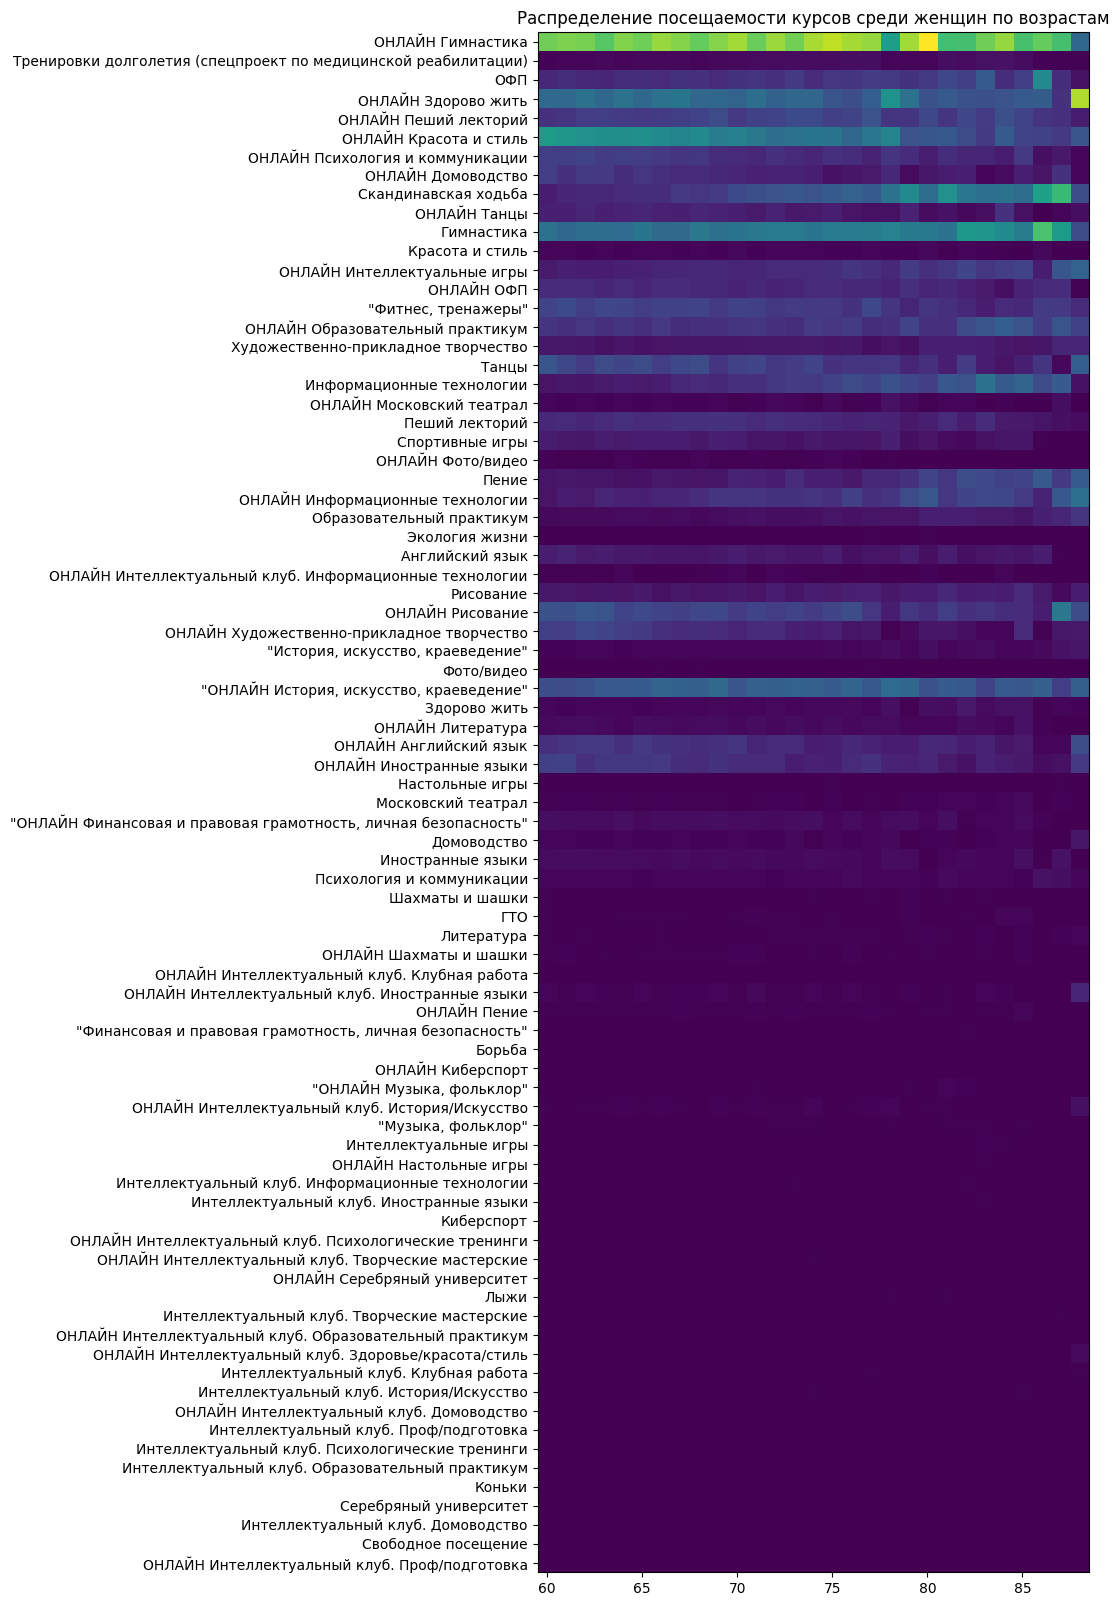

In [326]:
df_ = df[df['gender'] == 'Женщина']
df_['age'] = df_['age'].apply(lambda x: math.floor(x))
df_ = df_[(df_['age'] > 60)&(df_['age'] < 90)]

plt.figure(figsize = (10, 20))

df__ = pd.pivot_table(df_, index = 'd2LevelId', columns = 'age', values = 'date', aggfunc = 'count').fillna(0)
plt.imshow((df__.values / np.sum(df__.values, axis = 0)))
_ = plt.yticks(range(len(df__.index)), [d2LevelNamesReverse[i] for i in df__.index])
_ = plt.xticks(range(0, 30, 5), range(60, 90, 5))

plt.title('Распределение посещаемости курсов среди женщин по возрастам')

plt.savefig('./out/d2LevelHistFemale.png')

/tmp/ipykernel_642138/3525402426.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_['age'] = df_['age'].apply(lambda x: math.floor(x))


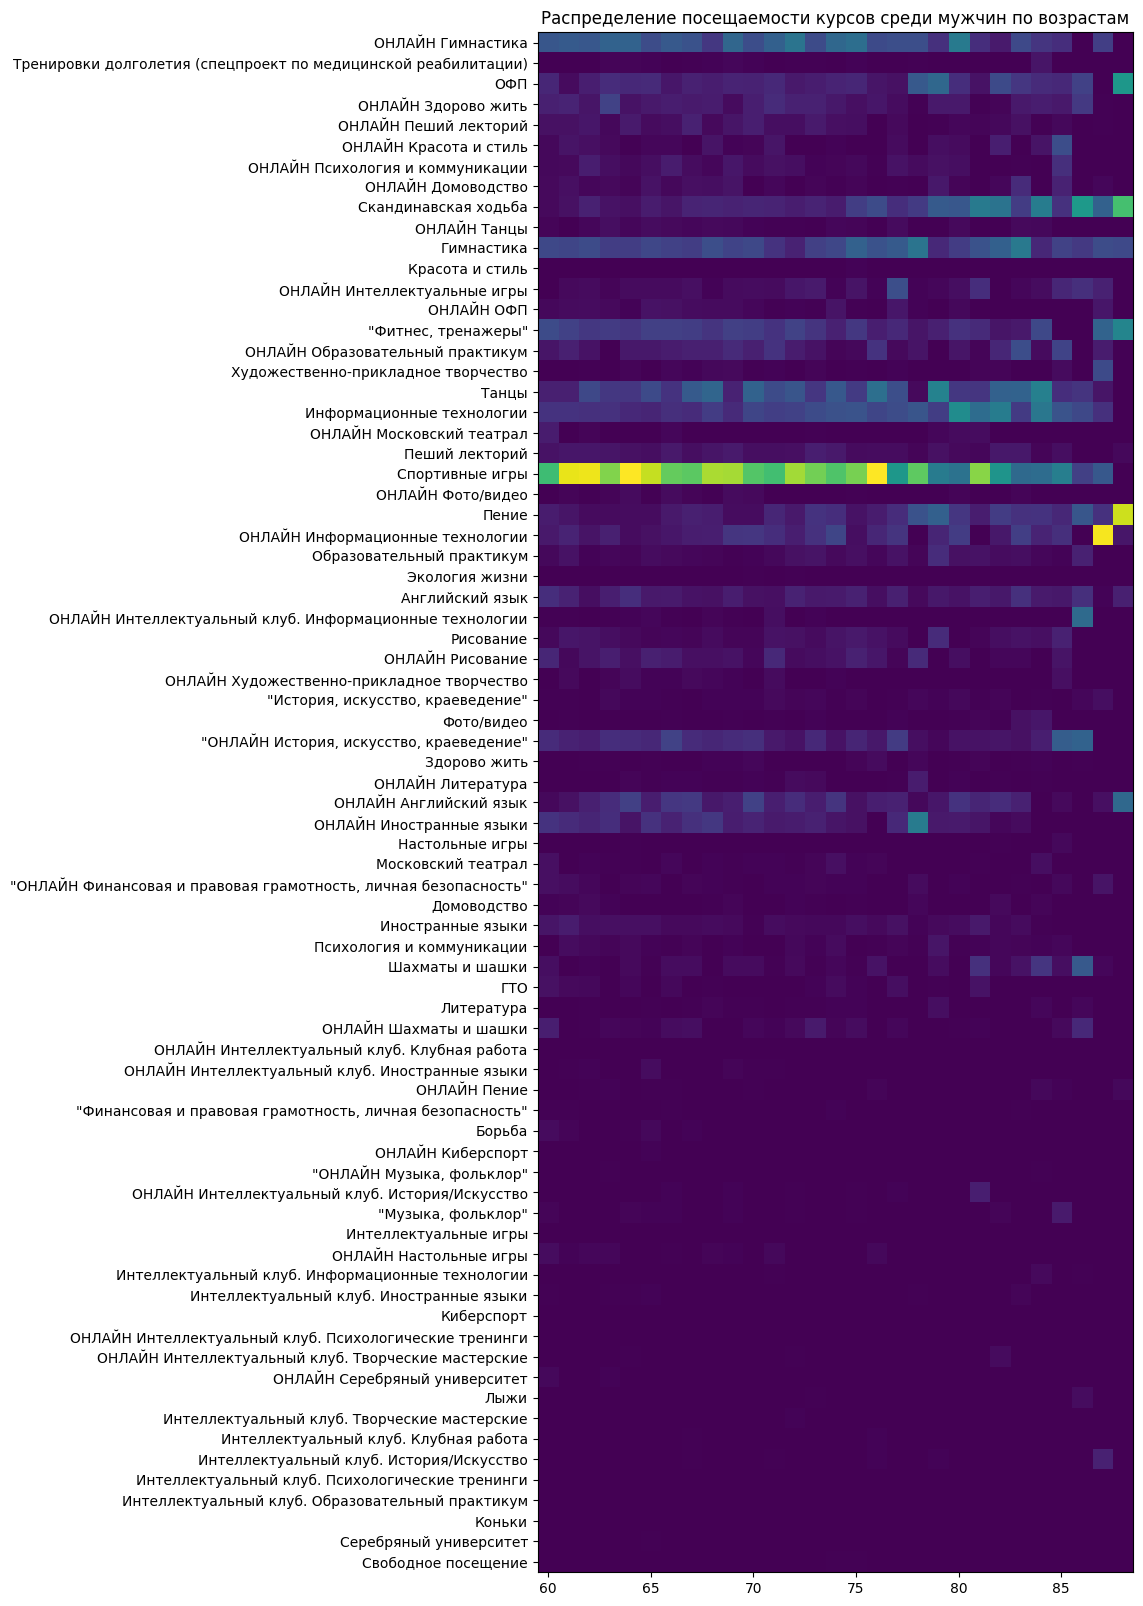

In [325]:
df_ = df[df['gender'] == 'Мужчина']
df_['age'] = df_['age'].apply(lambda x: math.floor(x))
df_ = df_[(df_['age'] > 60)&(df_['age'] < 90)]

plt.figure(figsize = (10, 20))

df__ = pd.pivot_table(df_, index = 'd2LevelId', columns = 'age', values = 'date', aggfunc = 'count').fillna(0)
plt.imshow((df__.values / np.sum(df__.values, axis = 0)))
_ = plt.yticks(range(len(df__.index)), [d2LevelNamesReverse[i] for i in df__.index])
_ = plt.xticks(range(0, 30, 5), range(60, 90, 5))

plt.title('Распределение посещаемости курсов среди мужчин по возрастам')

plt.savefig('./out/d2LevelHistMale.png')

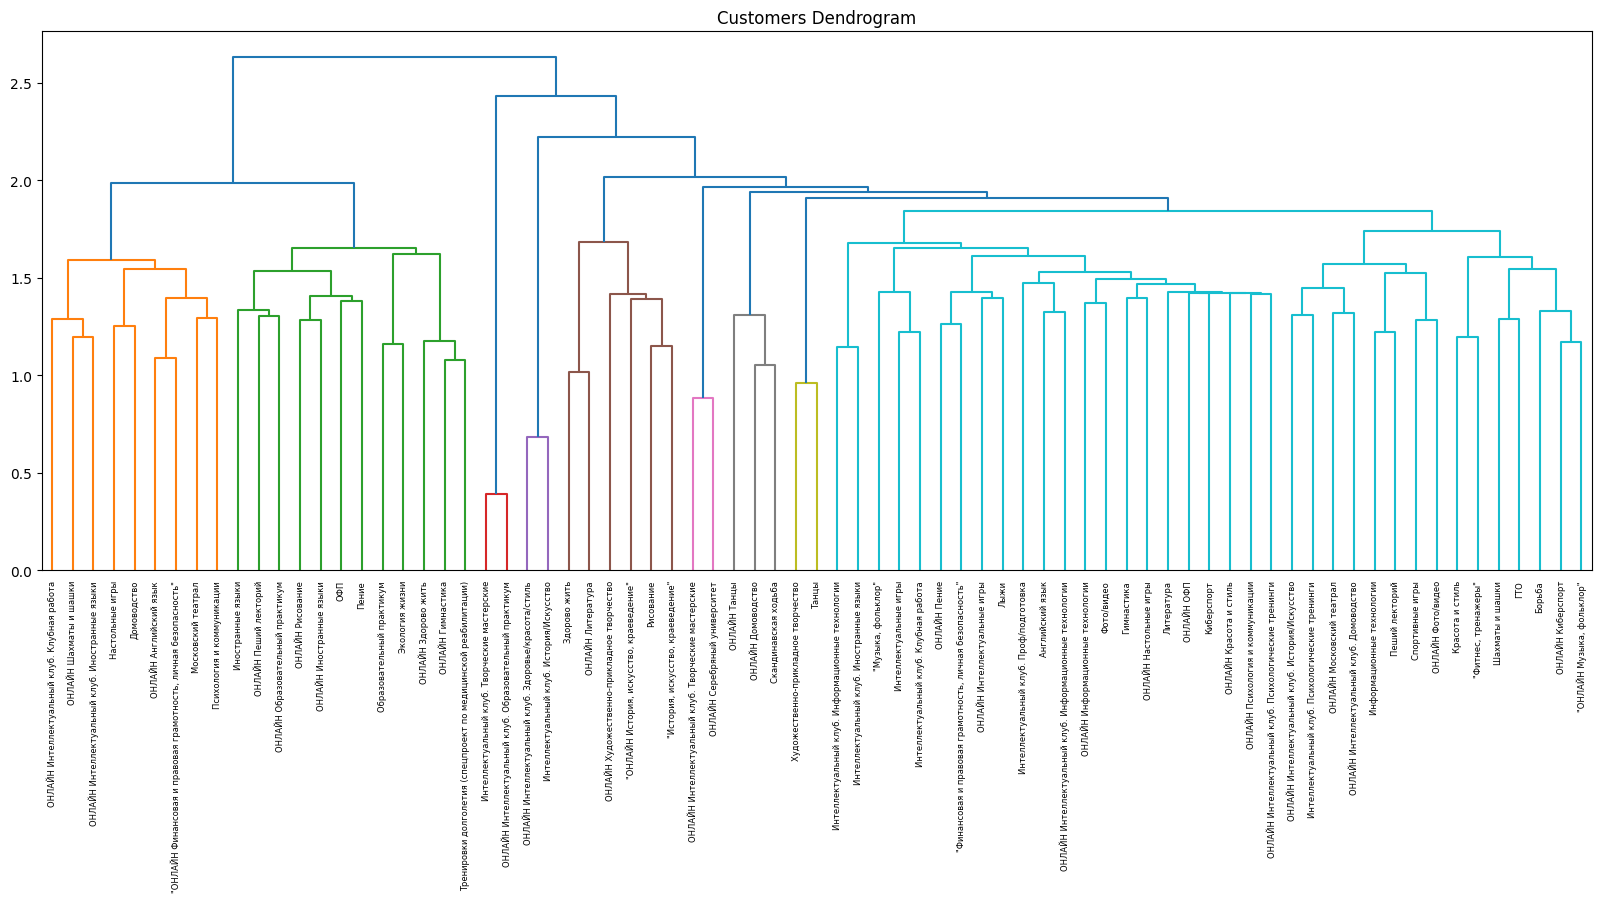

In [102]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 7))
plt.title("Customers Dendrogram")

# Selecting Annual Income and Spending Scores by index
clusters = shc.linkage(dffCorr.values, 
            method='ward', 
            metric="euclidean")
shc.dendrogram(Z=clusters)

_, ticks = plt.xticks()
ticks = [int(t.get_text()) for t in ticks]
__ = plt.xticks(_, [d2LevelNamesReverse[t] for t in ticks])

plt.savefig('./out/d2LevelNamesDendrogram.png', dpi = 200, bbox_inches='tight')

In [141]:
import sys
import os

os.environ["PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION"] = "python"
sys.path.append('/home/immichail/anaconda3/lib/python3.8/site-packages')

import umap

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

reducer = umap.UMAP()

dffp = PCA(n_components = 20).fit_transform(dff.values)

In [ ]:
embedding = reducer.fit_transform(dffp)
embedding.shape

In [284]:
dfGender = df.groupby('userId').agg({'gender': 'first'})

In [285]:
maleIndexes = np.where(dff.reset_index()[['userId']].merge(dfGender, on = 'userId').values[:, 1] == 'Мужчина')
femaleIndexes = np.where(dff.reset_index()[['userId']].merge(dfGender, on = 'userId').values[:, 1] == 'Женщина')

/tmp/ipykernel_642138/2792312589.py:1: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (2 levels on the left, 1 on the right)
  maleIndexes = np.where(dff.reset_index()[['userId']].merge(dfGender, on = 'userId').values[:, 1] == 'Мужчина')
/tmp/ipykernel_642138/2792312589.py:2: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (2 levels on the left, 1 on the right)
  femaleIndexes = np.where(dff.reset_index()[['userId']].merge(dfGender, on = 'userId').values[:, 1] == 'Женщина')


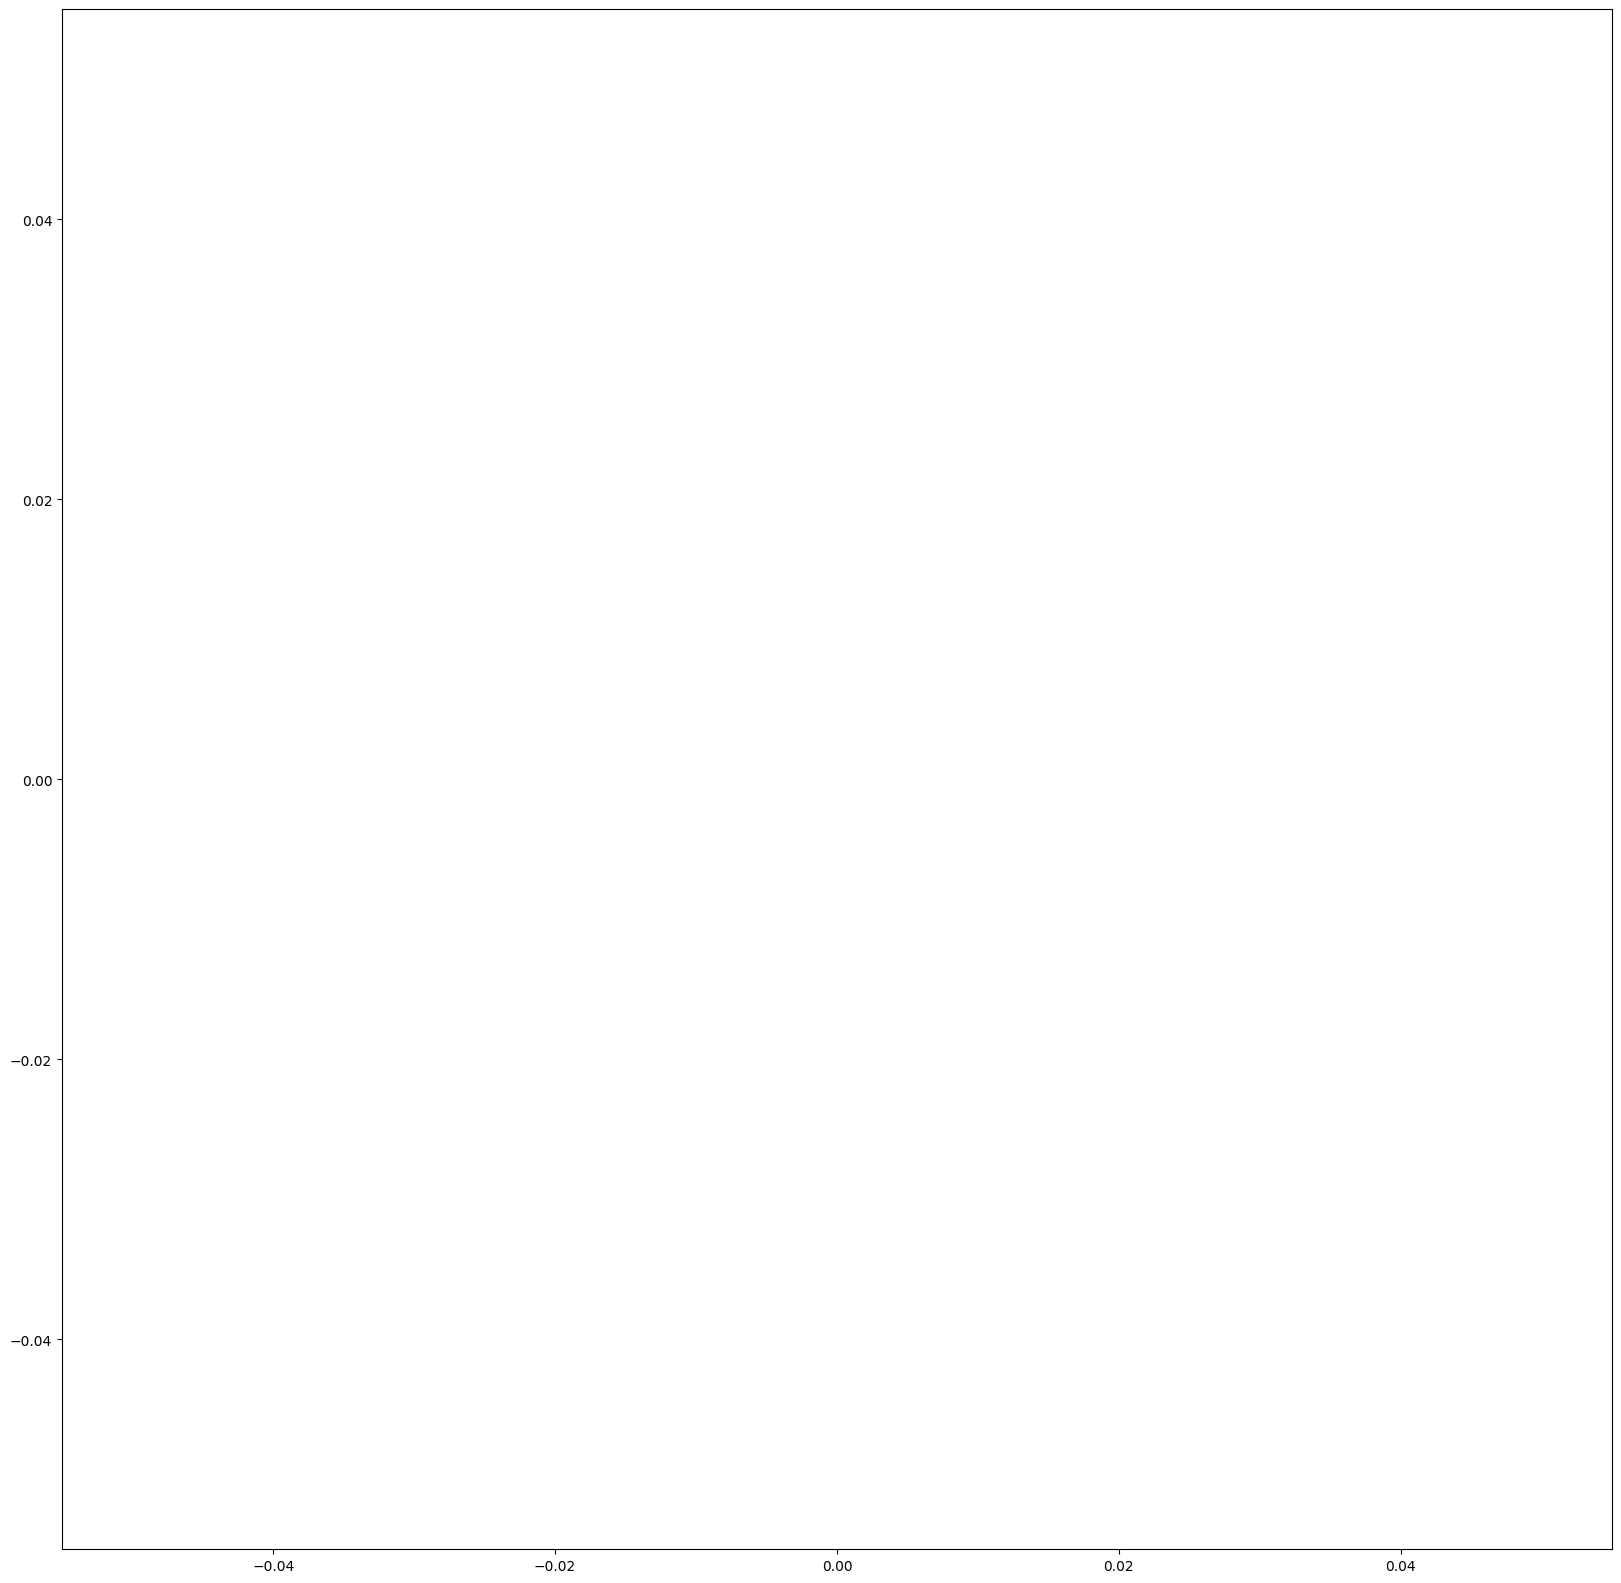

In [286]:
plt.figure(figsize=(20, 20))

_ = plt.plot(embedding[maleIndexes, 0], embedding[maleIndexes, 1], 'o', ms = 1, color = 'blue', alpha = 0.25)
_ = plt.plot(embedding[femaleIndexes, 0], embedding[femaleIndexes, 1], 'o', ms = 1, color = 'purple', alpha = 0.25)